In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#Data Cleaning
data=pd.read_csv("../data/heart.csv")
print(data.isna().sum())
data.shape
print(data["HeartDisease"].value_counts())
data=data[data["Cholesterol"]>0]
data["Sex"]=data["Sex"].map({'M':1,'F':0})
data_encoded=pd.get_dummies(data,drop_first=True)
print(data["HeartDisease"].value_counts(normalize=True))


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
HeartDisease
1    508
0    410
Name: count, dtype: int64
HeartDisease
0    0.522788
1    0.477212
Name: proportion, dtype: float64


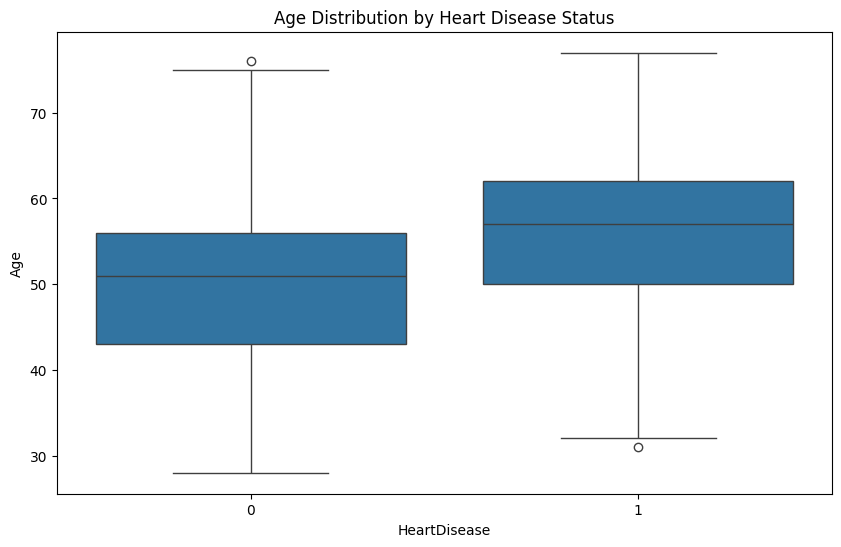

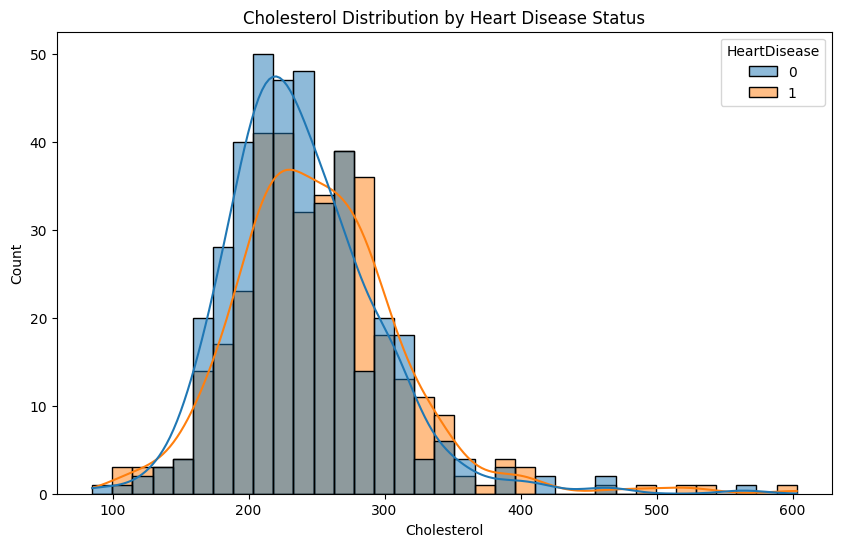

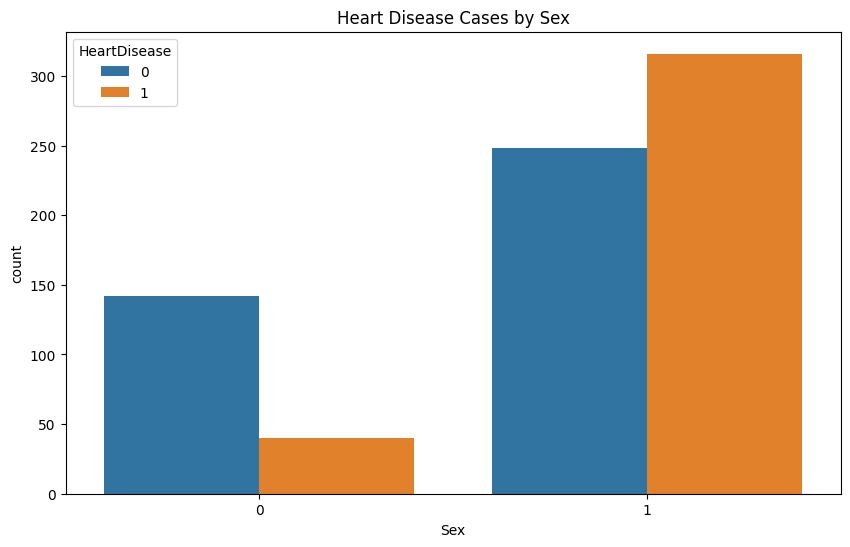

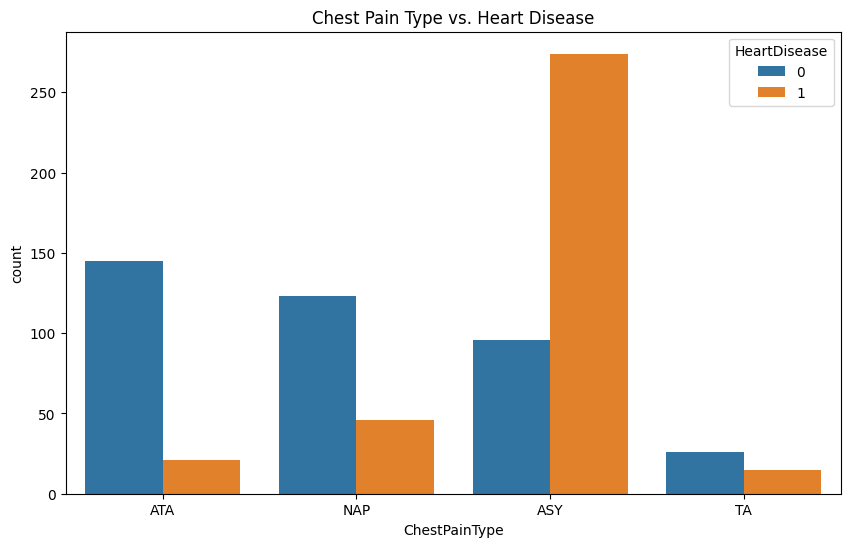

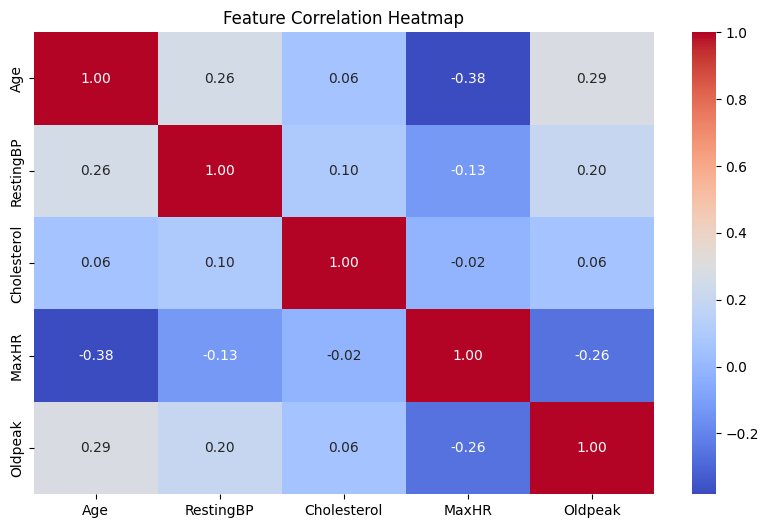

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,1,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,1,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,0,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [7]:
#EDA

#age vs Heart disease
plt.figure(figsize=(10,6))
sns.boxplot(data=data,x="HeartDisease",y="Age")
plt.title("Age Distribution by Heart Disease Status")
plt.savefig("../outputs/age_vs_heartdisease.png")
plt.show()

#Cholesterol Distribution
plt.figure(figsize=(10,6))
sns.histplot(data=data,x="Cholesterol",hue="HeartDisease",kde=True)
plt.title("Cholesterol Distribution by Heart Disease Status")
plt.savefig("../outputs/cholesterol_distribution.png")
plt.show()

#Sex vs Heart Disease
plt.figure(figsize=(10,6))
sns.countplot(data=data,x="Sex",hue="HeartDisease")
plt.title("Heart Disease Cases by Sex")
plt.savefig("../outputs/sex_vs_heartdisease.png")
plt.show()

#Chest Pain Type
plt.figure(figsize=(10,6))
sns.countplot(data=data,x="ChestPainType",hue="HeartDisease")
plt.title("Chest Pain Type vs. Heart Disease")
plt.savefig("../outputs/chestpain_vs_heartdisease.png")
plt.show()

#Correlation
num_cols=["Age","RestingBP","Cholesterol","MaxHR","Oldpeak"]
plt.figure(figsize=(10,6))
sns.heatmap(data_encoded[num_cols].corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.savefig("../outputs/correlation_heatmap.png")
plt.show()
data

In [8]:
#Data Processing
#Scale Numeric Features
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
data_encoded[num_cols]=scaler.fit_transform(data_encoded[num_cols])
data_encoded.to_csv("../data/heart_processed.csv",index=False)